# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[ 1.30747000e+05  2.04716304e+00  1.07986610e-01 ... -8.50246556e-02
  -8.42920007e-02  7.70000000e-01]
 [ 8.13440000e+04  1.28240449e+00  4.59864448e-01 ... -1.01678633e-02
  -5.33248686e-03  1.79000000e+00]
 [ 1.59004000e+05 -4.14862511e-01  1.20257796e-02 ...  2.37627707e-01
   2.04342556e-01  5.95000000e+00]
 ...
 [ 7.66160000e+04  1.51260229e+00 -9.49435315e-01 ... -1.41537086e-03
   3.66494418e-03  3.49000000e+01]
 [ 9.72530000e+04  1.79886333e+00 -1.69979073e+00 ... -3.36155803e-02
  -3.24705125e-02  1.71310000e+02]
 [ 7.48870000e+04 -5.89399721e-01  7.47828393e-01 ...  8.65917860e-02
   1.18083774e-01  1.59900000e+01]]


In [5]:
print(y_train)

[0 0 0 ... 0 0 0]


In [6]:
print(X_test)

[[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 ...  1.08494430e-01
   1.61139167e-01  4.00000000e+01]
 [ 1.57235000e+05 -3.49718405e-01  9.32618570e-01 ...  7.68300272e-02
   1.75561960e-01  1.98000000e+00]
 [ 1.52471000e+05 -1.61471082e+00 -2.40656973e+00 ...  2.86285101e-01
   4.37321868e-01  9.60000000e+01]
 ...
 [ 5.74810000e+04  1.40322087e+00 -4.39300461e-01 ... -1.04050698e-02
   6.48925492e-03  1.00000000e+01]
 [ 1.53018000e+05 -3.23131065e+00  2.10313977e+00 ...  4.72312731e-01
  -1.92528808e-01  9.99900000e+01]
 [ 4.03190000e+04  1.25756139e+00 -7.24477151e-01 ... -1.01754487e-01
   1.19557412e-02  9.00000000e+01]]


In [7]:
print(y_test)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 0.75665415  1.04272047  0.06657394 ... -0.21031503 -0.2607924
  -0.35356699]
 [-0.2834455   0.65277143  0.27902921 ... -0.02422764 -0.01672827
  -0.34945825]
 [ 1.35155922 -0.21266203  0.00863513 ...  0.59177033  0.631378
  -0.33270102]
 ...
 [-0.38298583  0.77014889 -0.57187168 ... -0.00246971  0.01108282
  -0.21608519]
 [ 0.05149257  0.91611288 -1.02491801 ... -0.0825166  -0.100612
   0.33339889]
 [-0.41938711 -0.30165824  0.45289483 ...  0.21630833  0.36475181
  -0.29225808]]


In [10]:
print(X_test)

[[ 0.65294525 -0.16599158  0.63983999 ...  0.27075637  0.49783617
  -0.19554147]
 [ 1.31431581 -0.17944516  0.56446664 ...  0.19204146  0.54241708
  -0.34869289]
 [ 1.21401756 -0.82446257 -1.45165396 ...  0.71272832  1.35151784
   0.03003663]
 ...
 [-0.78584206  0.71437549 -0.26386467 ... -0.02481731  0.01981277
  -0.31638689]
 [ 1.22553375 -1.64876398  1.27119885 ...  1.17517663 -0.59535274
   0.04610907]
 [-1.14716     0.64010398 -0.43604741 ... -0.25190392  0.0367097
   0.00586754]]


## Training the SVM model on the Training set

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Predicting the results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
a=accuracy_score(y_test, y_pred)
print(a*100)

[[71062    20]
 [   23    97]]
99.93960843796522


## F1 Score

In [29]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
print(f1*100)


81.8565400843882


## Visialization of Confusion Matirx

<Axes: >

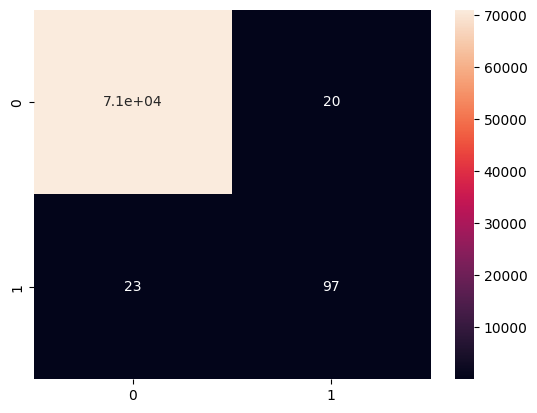

In [30]:
import seaborn as sns
sns.heatmap(cm, annot=True)